<a href="https://colab.research.google.com/github/Tikakiku/MachineLearningTasks/blob/main/Tugas6/K_Means_Clustering_Match.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Nama : Ratika Dwi Anggraini
# NIM : 1103201250
# Impor library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.metrics import davies_bouldin_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Path ke file dataset CSV di Google Drive Anda
file_path = '/content/drive/MyDrive/Colab Notebooks/Match.csv'

# Membaca dataset CSV menjadi dataframe
df = pd.read_csv(file_path)

# Sekarang df adalah dataframe yang berisi data dari dataset
# Anda dapat melakukan operasi dan analisis data lebih lanjut dengan dataframe ini


In [4]:
print(df)
df.columns

     Match_Id Match_Date  Team_Name_Id  Opponent_Team_Id  Season_Id  \
0      335987  18-Apr-08             2                 1          1   
1      335988  19-Apr-08             4                 3          1   
2      335989  19-Apr-08             6                 5          1   
3      335990  20-Apr-08             7                 2          1   
4      335991  20-Apr-08             1                 8          1   
..        ...        ...           ...               ...        ...   
572    981016  22-May-16             6                 2          9   
573    981018  24-May-16            13                 2          9   
574    981020  25-May-16            11                 1          9   
575    981022  27-May-16            13                11          9   
576    981024  29-May-16             2                11          9   

                                           Venue_Name  Toss_Winner_Id  \
0                               M Chinnaswamy Stadium               2   
1

Index(['Match_Id', 'Match_Date', 'Team_Name_Id', 'Opponent_Team_Id',
       'Season_Id', 'Venue_Name', 'Toss_Winner_Id', 'Toss_Decision',
       'IS_Superover', 'IS_Result', 'Is_DuckWorthLewis', 'Win_Type', 'Won_By',
       'Match_Winner_Id', 'Man_Of_The_Match_Id', 'First_Umpire_Id',
       'Second_Umpire_Id', 'City_Name', 'Host_Country'],
      dtype='object')

In [5]:
# Mengubah nama atribut dalam dataframe
df = df.rename(columns={
    "Match_Id": "ID",
    "Match_Date": "Date"
})

In [6]:
# Menghapus kolom "Team_Name_Id" dan "Opponent_Team_Id" dari dataframe
df = df.drop(columns=["Team_Name_Id", "Opponent_Team_Id"])
df.head()

,ID,Date,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,18-Apr-08,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,335988,19-Apr-08,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
2,335989,19-Apr-08,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India
3,335990,20-Apr-08,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India
4,335991,20-Apr-08,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

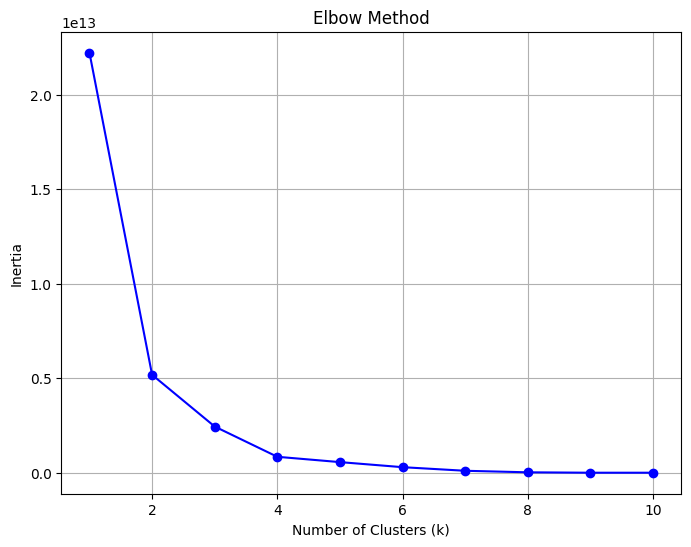

In [9]:

# Pilih atribut yang akan digunakan dalam analisis klaster
attributes = df[['ID', 'Season_Id', 'Toss_Winner_Id']]

# Inisialisasi daftar untuk menyimpan inertia (sum squared distances) untuk setiap k
inertia = []

# Mencoba jumlah klaster (k) dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


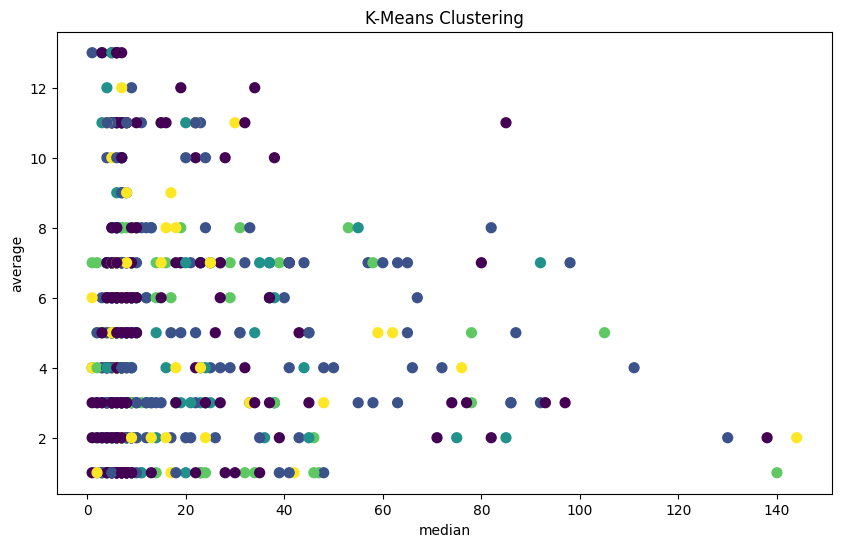

In [15]:
# Pilih atribut yang akan digunakan dalam K-Means Clustering
attributes = df[['First_Umpire_Id', 'Second_Umpire_Id', 'Toss_Winner_Id']]

# Membuat model K-Means Clustering dengan 5 klaster
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(attributes)

# Menambahkan kolom 'label' ke dataframe df
df['label'] = kmeans.labels_

# Memvisualisasikan hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['Won_By'], df['Match_Winner_Id'], c=df['label'], cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('median')
plt.ylabel('average')
plt.show()


In [16]:
# Inisialisasi sebuah dictionary untuk menyimpan nilai Silhouette Score
silhouette_scores = {}

# Coba jumlah klaster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(attributes, labels)
    silhouette_scores[k] = silhouette_avg

# Menampilkan hasil Silhouette Score untuk masing-masing k
for k, score in silhouette_scores.items():
    print(f'Silhouette Score for k={k}: {score:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.4100
Silhouette Score for k=3: 0.4478
Silhouette Score for k=4: 0.3952
Silhouette Score for k=5: 0.3895
Silhouette Score for k=6: 0.3916
Silhouette Score for k=7: 0.3712
Silhouette Score for k=8: 0.3786
Silhouette Score for k=9: 0.3841
Silhouette Score for k=10: 0.3888


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
# Inisialisasi sebuah list untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = []

# Coba jumlah klaster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    labels = kmeans.labels_
    dbi = davies_bouldin_score(attributes, labels)
    dbi_scores.append(dbi)

# Menampilkan hasil Davies-Bouldin Index untuk masing-masing k
for k, score in zip(range(2, 11), dbi_scores):
    print(f'Davies-Bouldin Index for k={k}: {score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 1.0552
Davies-Bouldin Index for k=3: 0.8281
Davies-Bouldin Index for k=4: 0.8886
Davies-Bouldin Index for k=5: 0.8641
Davies-Bouldin Index for k=6: 0.9296
Davies-Bouldin Index for k=7: 0.9123
Davies-Bouldin Index for k=8: 0.8868
Davies-Bouldin Index for k=9: 0.8657
Davies-Bouldin Index for k=10: 0.8576


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
